# Pair Graphs

In [106]:
import sys
sys.path.append("../../src")
%reload_ext autoreload
%autoreload 2
from theory202104 import *
from helpers import graph

## Recap of 2021-04-21

Pair Cardinality:
$$ 
\begin{align}
n_T: & \Sigma^2 \rightarrow \mathbb{N} \cup \{- \infty \} \\
n_T(ab) & = \left\{ 
  \begin{array}{rcl} n & \text{ if } a \neq b \text{ and } T \cap \{a,b\} = n \times (ab)   \\ 
  -\infty & \text{ otherwise } \end{array}\right. 
\end{align}
$$

* The pair $(a,b)$ is paired in $T$ if $n_T(ab) \ge 0$
* The pair $(a,b)$ is unpaired in $T$ if $n_T(ab) \lt 0$
* The set  of all pairs in $T$ is $\mathcal{P}_T = \{ (a,b) | a,b \in \Sigma(T); n_T( a,b ) \ge 0 \}$

Sequences:

* $\mathcal{S}_T = \{ S \in \Sigma^* | S \text{ is sequence in } T \}$ (all sequences in $T$) 
* A sequence $S$ is a **maximal sequence in $T$** if is not a combination of other sequences in $T$: $\nexists R, S' \in \mathcal{S}_T; S \neq R $ such that $\Sigma(S') = \Sigma(S) \cup \Sigma(R)$. 
* $\overline{ \mathcal{S}_T } = \{ S \in \mathcal{S}_T | S \text{ is maximal sequence in } T \}$ (maximal sequences in $T$)

**Lemma (consecutive sequence order)**: $s_j$ is the $j$-esim element of a sequence $S$ in $T$ $\iff$ there are exactly $j-1$ pairs $(x, s_j)$ paired in $T$ where $n_T(S) = n_T(x, s_j)$. All such $x$ lies inside $S$.

In [24]:
pandasPair( pairs_in_trace("abcabcabc")  ).T

,"(c, c)","(c, b)","(b, c)","(c, a)","(a, c)","(b, b)","(b, a)","(a, b)"
pairs,-1,-1,3,-1,3,-1,-1,3


## Equivalent Pair Graph

Let be $G_T=(V,E,n_T)$ a directed weighted graph where:

* $V = \Sigma(T)$
* $E = \Sigma(T) \times \Sigma(T) $
* $n_T( e )= n_T( ab )$ the cardinality of $e=(a,b)$

$G_T$ is called the equivalent pair graph. By construction the non negative edges are exactly the pairs of the trace: 

$\mathcal{P}_T = \{ (a,b) | a,b \in \Sigma(T); n_T( a,b ) \ge 0 \} =  \{ e | e \in E; n_T( e ) \ge 0 \}$

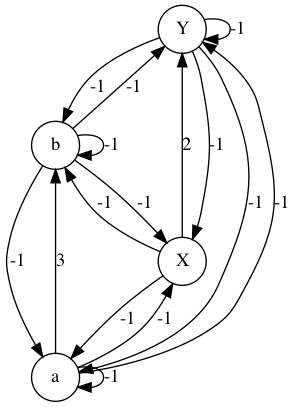

In [71]:
G_T = pair_graph("abXYabXaYb")
graph(G_T)

## n-layer of a pair graph

An n-layer of $G_T$ is the directed subgraph where $n_T(e) = n$, formally defined as:

$G_T^n = (V_T^n, E_T^n)$ where:

* $E_T^n = \{ e \in E(G_T) | n_T(e) = n \}$
* $V_T^n = \Sigma( E_T^n ) $ 

Note how the n-layer captures all pairs $(a,b)$ with $n_T(a,b) = n$

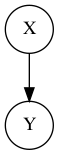

In [122]:
graph( n_layer(G_T, 2) )

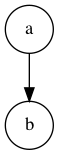

In [123]:
graph( n_layer(G_T, 3) )

## Sequences in Pair Graphs

Any sequence $S=s_1 ... s_m$ in $T$ is totally contained in the n-layer with $n = n_T(S)$, by using the property that all its pairs has the same cardinality $n_T(S)$. 

By the lemma of consecutive sequence order, (... long way from here...) then the cliques ordered by its inDegree corresponds to maximal sequences with cardinality $n$.

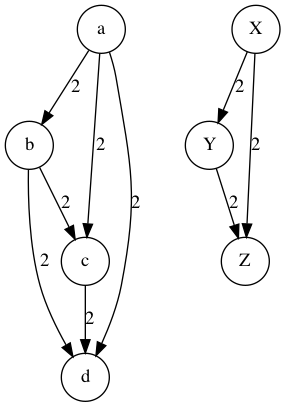

cardinality of abcd in T = 2
cardinality of XYZ in T = 2


In [129]:
T="abcdabcdXYZXYZ"

G_T = pair_graph(T)
graph( non_negative_graph(G_T) )

print('cardinality of abcd in T = {}'.format( sequence_cardinality('abcd', T) ))
print('cardinality of XYZ in T = {}'.format( sequence_cardinality('XYZ', T) ))

## Overhead in Python

The experiments below shows no significant overhead by using pandas or networkx library.

In [121]:
for i in [100,200,300,400,500]:
    print("\n\n computations with sigma={}\n".format(i))
    %time a=pairs_in_trace( range(i) )
    %time a=pandasPair( pairs_in_trace( range(i) )  )
    %time a=pair_graph( range(i) )



 computations with sigma=100

CPU times: user 82.5 ms, sys: 10 ms, total: 92.5 ms
Wall time: 91.5 ms
CPU times: user 61.3 ms, sys: 3.97 ms, total: 65.3 ms
Wall time: 65.4 ms
CPU times: user 73.3 ms, sys: 690 µs, total: 73.9 ms
Wall time: 74 ms


 computations with sigma=200

CPU times: user 246 ms, sys: 1.7 ms, total: 248 ms
Wall time: 248 ms
CPU times: user 352 ms, sys: 2.99 ms, total: 355 ms
Wall time: 356 ms
CPU times: user 404 ms, sys: 4.38 ms, total: 408 ms
Wall time: 408 ms


 computations with sigma=300

CPU times: user 852 ms, sys: 6 ms, total: 858 ms
Wall time: 860 ms
CPU times: user 1.12 s, sys: 13.7 ms, total: 1.14 s
Wall time: 1.14 s
CPU times: user 1.21 s, sys: 14.8 ms, total: 1.23 s
Wall time: 1.23 s


 computations with sigma=400

CPU times: user 2.05 s, sys: 7.3 ms, total: 2.06 s
Wall time: 2.06 s
CPU times: user 2.56 s, sys: 24.8 ms, total: 2.58 s
Wall time: 2.59 s
CPU times: user 2.75 s, sys: 28.7 ms, total: 2.77 s
Wall time: 2.78 s


 computations with sigma=500

C